https://lofti-gaia.readthedocs.io/en/latest/tutorials/QuickStart.html

In [1]:
import pandas as pd

rv = pd.read_csv("../rv/rvout_TOI5671.dat",header=None,delim_whitespace=True)
rv = rv.drop(rv.index[[5,12,16]])
print(rv)

               0           1          2            3            4      5
0   2.460042e+06  236.098298  32.443436  1882.336085  1477.518555  210.0
1   2.460042e+06  276.621086  31.503643  1740.092043  1281.006233  242.0
2   2.460042e+06   -6.259502  51.382588  2156.562077  1842.144399  138.0
3   2.460042e+06   53.897957  57.897331  2222.306427  1795.776970  147.0
4   2.460042e+06  121.160048  36.540409  1893.604122  1417.525087  211.0
6   2.460074e+06 -111.844054  21.495063  1314.979623   687.026180  279.0
7   2.460075e+06  233.139018  27.708191  1530.967525   984.131208  294.0
8   2.460075e+06  197.542974  21.690891  1404.120447   819.786210  276.0
9   2.460076e+06   61.185449  35.103784  1836.272072  1302.588377  249.0
10  2.460076e+06    8.493320  25.215836  1528.987613   938.470054  287.0
11  2.460076e+06    0.000000  24.617423  1528.622869   949.482090  294.0
13  2.460157e+06 -162.903928  22.906626  1533.113860  1017.011269  291.0
14  2.460160e+06 -363.356917  24.850000  1463.17098

In [2]:
from astropy.time import Time

rv2 = rv[[0,1,2]].copy()

rv2[0] = Time(rv2[0], format='jd').decimalyear
rv2[[1,2]] = rv2[[1,2]].apply(lambda x: x/1e3)
rv2[1] = rv2[1]#*-1
rv2.columns = ['rv_dates','rv','rverr']
rv2

,rv_dates,rv,rverr
0,2023.263921,0.236098,0.032443
1,2023.263979,0.276621,0.031504
2,2023.264609,-0.006260,0.051383
3,2023.264667,0.053898,0.057897
4,2023.264725,0.121160,0.036540
6,2023.351504,-0.111844,0.021495
7,2023.354290,0.233139,0.027708
8,2023.354349,0.197543,0.021691
9,2023.357035,0.061185,0.035104
10,2023.357093,0.008493,0.025216


In [2]:
# Gaia DR2 source ids:
primary = 1485436090253565056
secondary = 1485436090253564928
# Mass estimates, must be a tuple of (value,uncertainty)
# in solar masses:
massA = (0.4, 0.1)
massB = (0.4, 0.1)

# Import the Fitter and FitOrbit objects:
from lofti_gaia.lofti import Fitter, FitOrbit

# Initialize the fitter object:
fitterobject = Fitter(primary,           # source id object 1
                      secondary,           # source id object 2
                      massA,            # mass object 1
                      massB,            # mass object 2
                      Norbits=100,     # number of desired accepted orbits for the posterior orbit sample
                      # user_rv = rv2,
                      catalog='gaiadr3.gaia_source'
                     )

# run orbit fit:
orbits = FitOrbit(fitterobject)

# get fit results:
results = orbits.results

Saving orbits in FitResults.2024.03.25.12.51.19.txt
inital chi min 0.8093632596696192
100% (107 of 100): |####################|  Done...
Final Norbits: 107


In [3]:
# Proper motion of B relative to A in RA in km s^-1:
print(fitterobject.pmRA)
# Distance to system in pc:
print(fitterobject.distance)
# Relative separation in mas:
print(fitterobject.sep)
# Relative separation in AU:
print(fitterobject.sep_au)

[-0.012723440807317243, 0.022266831242541016]
(164.2943603389591, 0.9402531043498957)
(6972.7238186348495, 0.029675390822915596)
(1145.579199602837, 0.004875499353059535)


In [4]:
fitterobject.__dict__.keys()

dict_keys(['sourceid1', 'sourceid2', 'mass1', 'mass1err', 'mass2', 'mass2err', 'mtot', 'Norbits', 'results_filename', 'stats_filename', 'astrometry', 'use_user_rv', 'catalog', 'ruwe1', 'ruwe2', 'ref_epoch', 'plx1', 'plx2', 'RA1', 'RA2', 'Dec1', 'Dec2', 'pmRA1', 'pmRA2', 'pmDec1', 'pmDec2', 'rv', 'plx', 'distance', 'deltaRA', 'deltaDec', 'pmRA', 'pmDec', 'sep', 'pa', 'sep_au', 'sep_km', 'total_vel', 'total_planeofsky_vel', 'deltaGmag'])

In [8]:
fitterobject.ruwe1, fitterobject.ruwe2

(1.0459337, 1.0312111)

In [6]:
fitterobject.deltaGmag

-1.0260715

In [7]:
fitterobject.ruwe1, fitterobject.ruwe2

(1.0459337, 1.0312111)

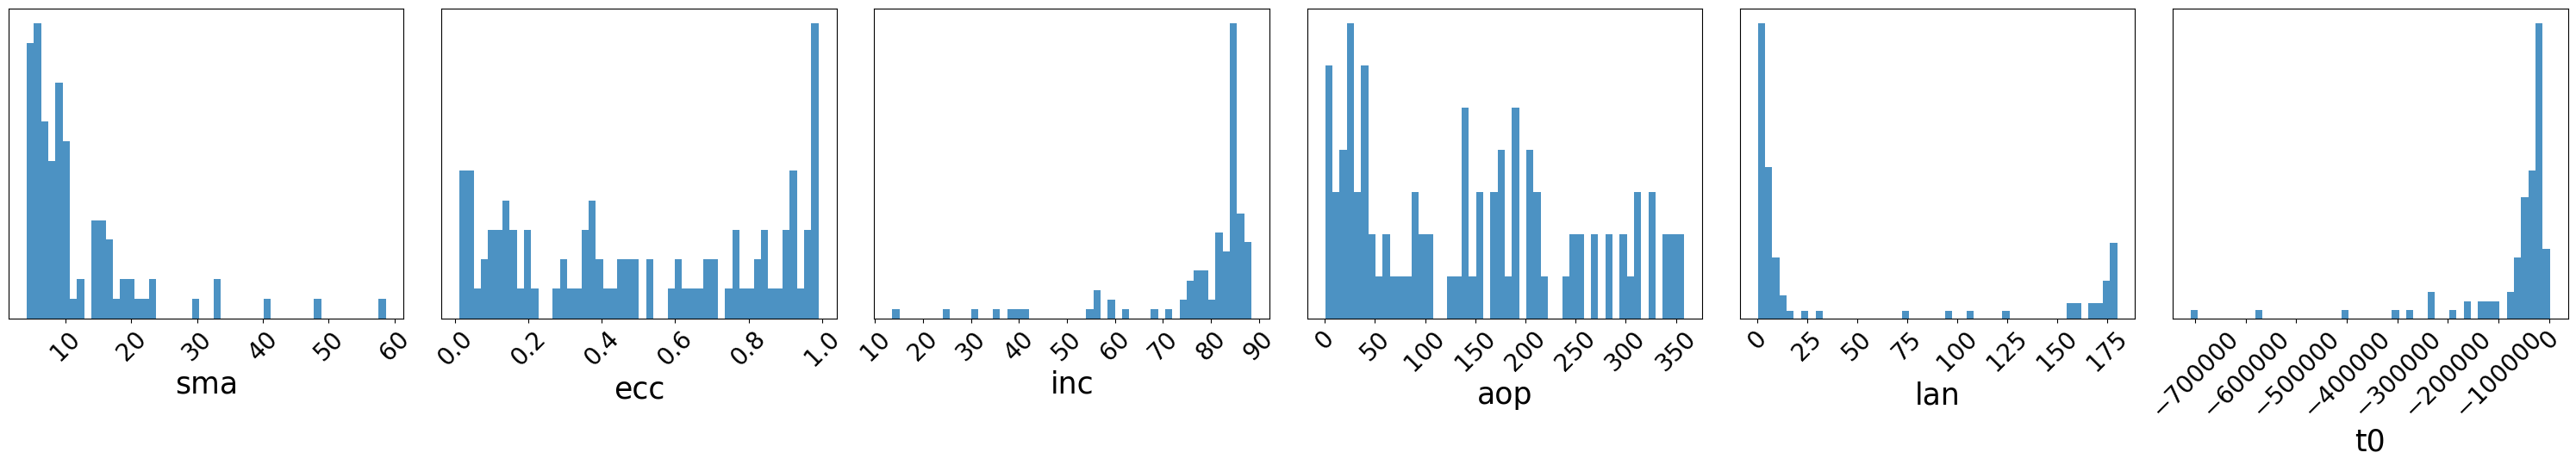

In [8]:
hists = results.PlotHists()

In [9]:
from aesthetic.plot import savefig, set_style
set_style('science')
# pl.style.use('default')

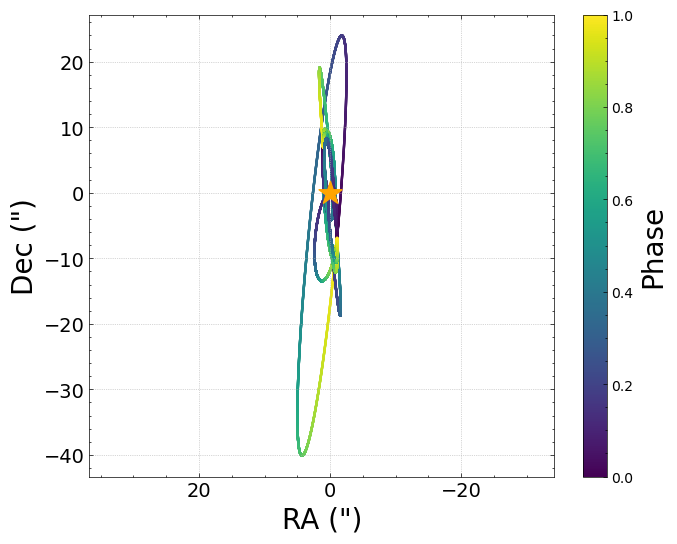

In [11]:
import matplotlib.pyplot as pl
plotorbits = results.PlotOrbits(size=10, plot3d=False)
# pl.gca().spines[['right', 'left', 'top']].set_visible(False)

In [12]:
savefig(plotorbits, '../figures/gaia_lofti.png', dpi=300, writepdf=False)

2024-01-17T01:30:55.285558: made ../figures/gaia_lofti.png


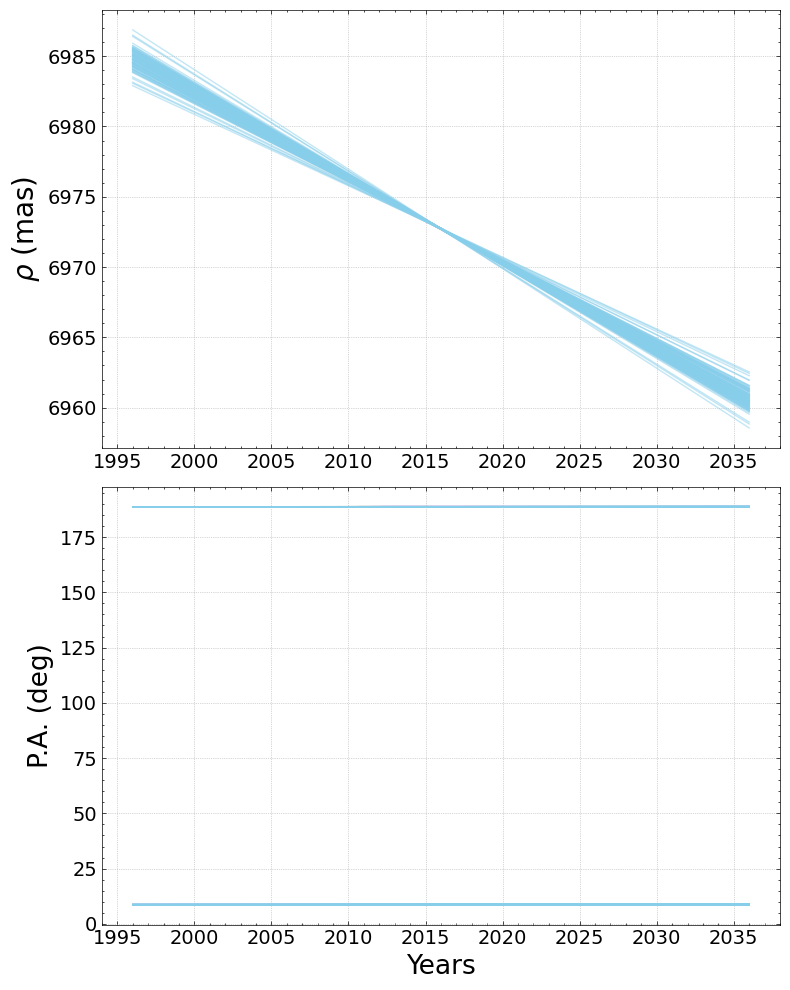

In [13]:
plotseppa = results.PlotSepPA()